In [15]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [16]:
# Creating base dataframe from cleaned source
file = "Resources/cleaned_card_data.csv"
df = pd.read_csv(file)
df.head()

,Distance From Home,Distance From Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chip,Used Pin Number,Online Order,Fraud
0,57.88,0.31,1.95,1,1,0,0,0
1,10.83,0.18,1.29,1,0,0,0,0
2,5.09,0.81,0.43,1,0,0,1,0
3,2.25,5.60,0.36,1,1,0,1,0
4,44.19,0.57,2.22,1,1,0,1,0


In [17]:
# Row count of Fraud and non-Fraud transactions
df.count()

Distance From Home                1000000
Distance From Last Transaction    1000000
Ratio to Median Purchase Price    1000000
Repeat Retailer                   1000000
Used Chip                         1000000
Used Pin Number                   1000000
Online Order                      1000000
Fraud                             1000000
dtype: int64

<Axes: >

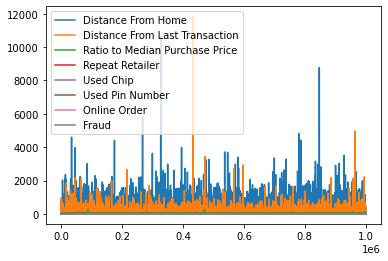

In [18]:
# Plot dataframe to check for trends
df.plot()

In [19]:
# Narrow down the columns to Ratio to Median Purchase Price and Fraud
median_price_df = df[['Ratio to Median Purchase Price','Fraud']]
display(median_price_df.head())
display(median_price_df.tail())

,Ratio to Median Purchase Price,Fraud
0,1.95,0
1,1.29,0
2,0.43,0
3,0.36,0
4,2.22,0


,Ratio to Median Purchase Price,Fraud
999995,1.63,0
999996,2.78,0
999997,0.22,0
999998,0.48,0
999999,0.39,0


In [20]:
# Get general statistics of dataframe.
median_price_df.describe()

,Ratio to Median Purchase Price,Fraud
count,1000000.000000,1000000.000000
mean,1.824176,0.087403
std,2.799589,0.282425
min,0.000000,0.000000
25%,0.480000,0.000000
50%,1.000000,0.000000
75%,2.100000,0.000000
max,267.800000,1.000000


In [21]:
# Average Median Purchase Price
median_price_df['Ratio to Median Purchase Price'].mean()

1.8241762099999994

<Figure size 576x432 with 0 Axes>

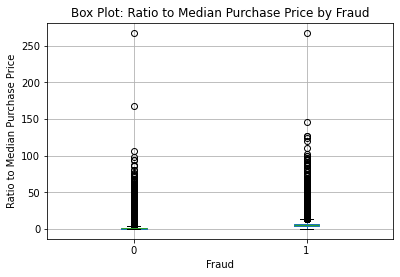

In [22]:
# Box plot to display distributions of data
plt.figure(figsize=(8, 6))
median_price_df.boxplot(column='Ratio to Median Purchase Price',by='Fraud')
plt.title('Box Plot: Ratio to Median Purchase Price by Fraud')
plt.suptitle('')
plt.xlabel('Fraud')
plt.ylabel('Ratio to Median Purchase Price')
plt.grid(True)
plt.show()

In [23]:
# Define the correlation variable
corr_df = median_price_df.corr()

In [24]:
# Correlation dataframe columns
corr_df.columns

Index(['Ratio to Median Purchase Price', 'Fraud'], dtype='object')

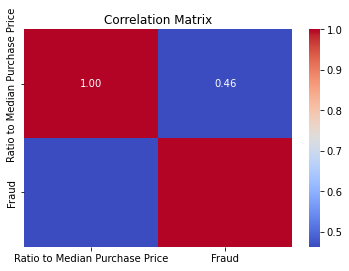

In [25]:
# Plot the correlation between the Median Purchase Price and Fraud
plt.figure()
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Filter rows where Fraud is 1
fraudulant_df = median_price_df[median_price_df['Fraud'] == 1]
#fraudulant_df = fraudulant_df.sample(n=1000,random_state=5)
fraudulant_df.head()

,Ratio to Median Purchase Price,Fraud
13,6.36,1
24,1.87,1
29,0.86,1
35,4.60,1
36,4.89,1


In [27]:
# Count of Fraudulant transactions
fraudulant_df.count()

Ratio to Median Purchase Price    87403
Fraud                             87403
dtype: int64

In [28]:
# Average Ratio Median Purchase Price
fraudulant_df['Ratio to Median Purchase Price'].mean()

6.006333649874719

In [29]:
# Get median of the Ratio to Median Purchase Price column for fraudulant transactions
np.median(fraudulant_df['Ratio to Median Purchase Price'])

5.07

In [30]:
# Get min and max of Ratio to Median Purchase Price column
display(fraudulant_df.max())
display(fraudulant_df.min())

Ratio to Median Purchase Price    266.69
Fraud                               1.00
dtype: float64

Ratio to Median Purchase Price    0.01
Fraud                             1.00
dtype: float64

In [31]:
# Filter rows where Fraud is 0
non_fraudulant_df = median_price_df[median_price_df['Fraud'] == 0]
#non_fraudulant_df = non_fraudulant_df.sample(n=1000,random_state=5)
non_fraudulant_df.head()

,Ratio to Median Purchase Price,Fraud
0,1.95,0
1,1.29,0
2,0.43,0
3,0.36,0
4,2.22,0


In [32]:
# Count of non-fraudulant transactions
non_fraudulant_df.count()

Ratio to Median Purchase Price    912597
Fraud                             912597
dtype: int64

In [33]:
# Average Ratio to Median Purchase Price non-fraudulant
non_fraudulant_df['Ratio to Median Purchase Price'].mean()

1.42363456158633

In [34]:
# Get median of the Ratio to Median Purchase Price column for fraudulant transactions
np.median(non_fraudulant_df['Ratio to Median Purchase Price'])

0.91

In [39]:
# Display unsampled data average
display(fraudulant_df.mean())
display(non_fraudulant_df.mean())

Ratio to Median Purchase Price    6.006334
Fraud                             1.000000
dtype: float64

Ratio to Median Purchase Price    1.423635
Fraud                             0.000000
dtype: float64

In [35]:
# Create new dataframes with equal number of row counts for analysis
f_df = fraudulant_df.sample(n=1000,random_state=5)
nf_df = non_fraudulant_df.sample(n=1000,random_state=5)

In [38]:
# Display sampled fraudulent and non-fraudlent average
display(f_df.mean())
display(nf_df.mean())

Ratio to Median Purchase Price    6.11883
Fraud                             1.00000
dtype: float64

Ratio to Median Purchase Price    1.50825
Fraud                             0.00000
dtype: float64

In [36]:
"""
Perform t-test to determine if data is statistically significant
Meaning the closer the p-value is to 0 the more likely the observed difference
is not due to chance.
"""
ttest_ind(f_df['Ratio to Median Purchase Price'],nf_df['Ratio to Median Purchase Price'])

TtestResult(statistic=26.91252199801378, pvalue=2.16231999038988e-136, df=1998.0)

# Conclusion

## Questions

### How does the ratio to median purchase price affect the probability of a fraudulent transaction?
Through some analysis and comparison, I have determined that the ratio to median purchase price does have some affect on the likelihood of a transaction being fraudulent. The correlation between the ratio to median purchase price and fraud is ~.5 positive correlation. Meaning that when the ratio to median purchase price is higher the more likely there will be fraud.
### Are higher ratios to median purchase prices more indicative of fraud activity vs lower ratios?
To answer this question I separated the data into two dataframes. One with fraudulent transactions and the other with non-fraudulent transactions. This allowed me to perform some basic statistics on the two datasets, more specifically calculate the mean of the two. Which shows that the fraudulent transactions tend to on average have higher ratios to median prices.